In [1]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
path = 'vaccination_tweets.csv'
df = pd.read_csv(path, usecols=['text'])
df.head()


,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [4]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)

    return text


df['text'] = df['text'].apply(cleanTxt)
df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine wh...


In [5]:
# Create function to retrieve subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create function to retrieve polarity


def getPolarity(text):
    return TextBlob(text).sentiment.polarity


# retrieve subjectivity
df['Subjectivity'] = df['text'].apply(getSubjectivity)

#retrieve polarity
df['Polarity'] = df['text'].apply(getPolarity)

df.head()

,text,Subjectivity,Polarity
0,Same folks said daikon paste could treat a cyt...,0.125000,0.00
1,While the world has been on the wrong side of ...,0.900000,-0.50
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0.033333,0.00
3,"Facts are immutable, Senator, even when you're...",0.550000,-0.05
4,Explain to me again why we need a vaccine wh...,0.000000,0.00


In [6]:
#Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score > 0:
    return 'Positive'
  else:
    return 'Neutral'


df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show dataframe
df

,text,Subjectivity,Polarity,Analysis
0,Same folks said daikon paste could treat a cyt...,0.125000,0.000000,Neutral
1,While the world has been on the wrong side of ...,0.900000,-0.500000,Negative
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0.033333,0.000000,Neutral
3,"Facts are immutable, Senator, even when you're...",0.550000,-0.050000,Negative
4,Explain to me again why we need a vaccine wh...,0.000000,0.000000,Neutral
...,...,...,...,...
11015,"The number of Covid-19 cases today, 17 Novembe...",0.000000,0.000000,Neutral
11016,First dose ✅\nPfizerBioNTech,0.333333,0.250000,Positive
11017,"The number of Covid-19 cases today, 16 Novembe...",0.000000,0.000000,Neutral
11018,PfizerBioNTech has developed new pill Paxlovid...,0.501515,-0.121212,Negative


<function matplotlib.pyplot.show(close=None, block=None)>

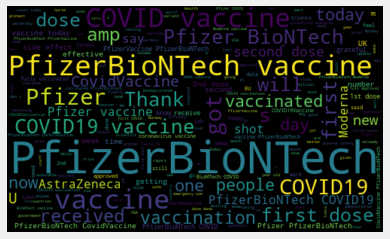

In [7]:
#Plot the word cloud
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21,
                      max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [8]:
#Print all the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+') '+sortedDF['text'][i])
    print()
    j = j+1

1) Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… 

2) There have not been many bright days in 2020 but here are some of the best 
1. BidenHarris winning Election2020… 

3) while deaths are closing in on the 300,000 mark... millions of people wait PfizerBioNTech Vaccine !
-
The first U… 

4)  COVID19 CovidVaccine vaccine Corona   PfizerBioNTech bbcnews NYTimes BBCNews Best wishes to the US… 

5) The agency also released new information for health care providers and for patients as the US shipped millions of d… 

6) Trump announces vaccine rollout 'in less than 24 hours'

The first Americans will be vaccinated against… 

7) Coronavirus: Iran reports 8,201 new cases, 221 deaths in the last 24 hours Iran coronavirus PfizerBioNTech… 

8) How much did the fda get paid to approve this all of a sudden now? money makes the world go around. vaccine… 

9) Trump announces vaccine rollout 'in less than 24 hours'

The first Americans will be

In [9]:
#Print all the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+') '+sortedDF['text'][i])
    print()
    j = j+1


1) While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… 

2) Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… 

3) it is a bit sad to claim the fame for success of vaccination on patriotic competition between USA, Canada, UK and… 

4) . will rake in billions from its expensive CovidVaccine but  refuses to cut the price for lowe… 

5) The trump administration failed to deliver on vaccine promises, *shocker* COVIDIOTS coronavirus CovidVaccine… 

6) Wear a mask, wash your hands, and remain socially distant when possible. stayhome StayAtHome StayAtHomeSaveLives… 

7)   Please don’t spread fake news! There is no evidence that these cases are linked to the… 

8) All respect to due process but why not give approval now instead of the 29th of December. Surely multiple other cou… 

9)    check out table 23 of this and other tables too because it took the penny a w…

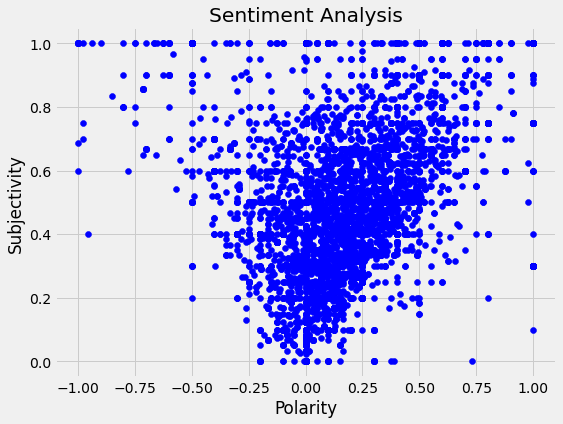

In [10]:
#plot the polarity and subjectivity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [11]:
#get the percentage of Positive Tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']

round((ptweets.shape[0] / df.shape[0])*100, 1)


42.5

In [12]:
#get the percentage of negative Tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['text']

round((ntweets.shape[0] / df.shape[0])*100, 1)


10.3

In [13]:
#get the percentage of neutral Tweets
neuttweets = df[df.Analysis == 'Neutral']
neuttweets = neuttweets['text']

round((neuttweets.shape[0] / df.shape[0])*100, 1)

47.2

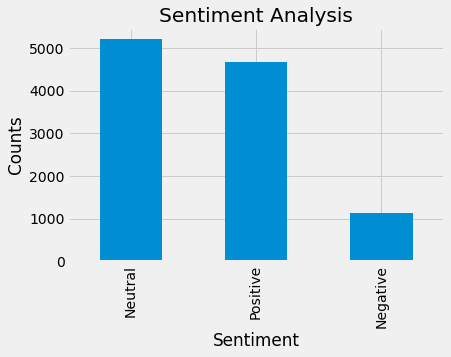

In [14]:
#show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()


/Users/a123/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


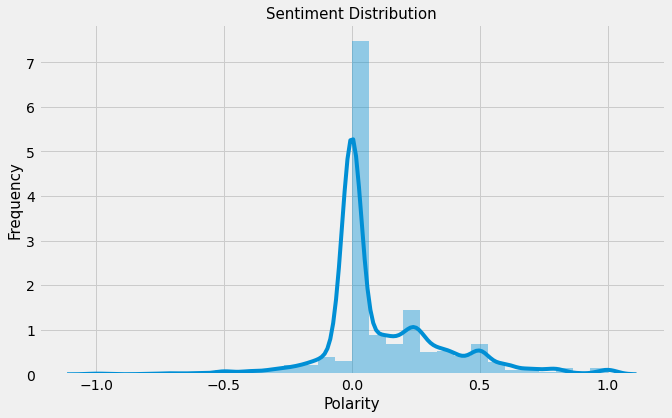

In [15]:
# sentiment distribution
plt.figure(figsize=(10, 6))
sns.distplot(df['Polarity'], bins=30)
plt.title('Sentiment Distribution', size=15)
plt.xlabel('Polarity', size=15)
plt.ylabel('Frequency', size=15)
plt.show()